<a href="https://colab.research.google.com/github/Srija-Swarna/Deep-learning-model-for-Early-detection-of-plant-nutritional-deficiencies/blob/main/EDA_of_the_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageStat
import os
import numpy as np
from skimage import io, color
from skimage.filters import rank
from skimage.morphology import disk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
from collections import defaultdict

**Distribution of Class in Train test val dataset.**

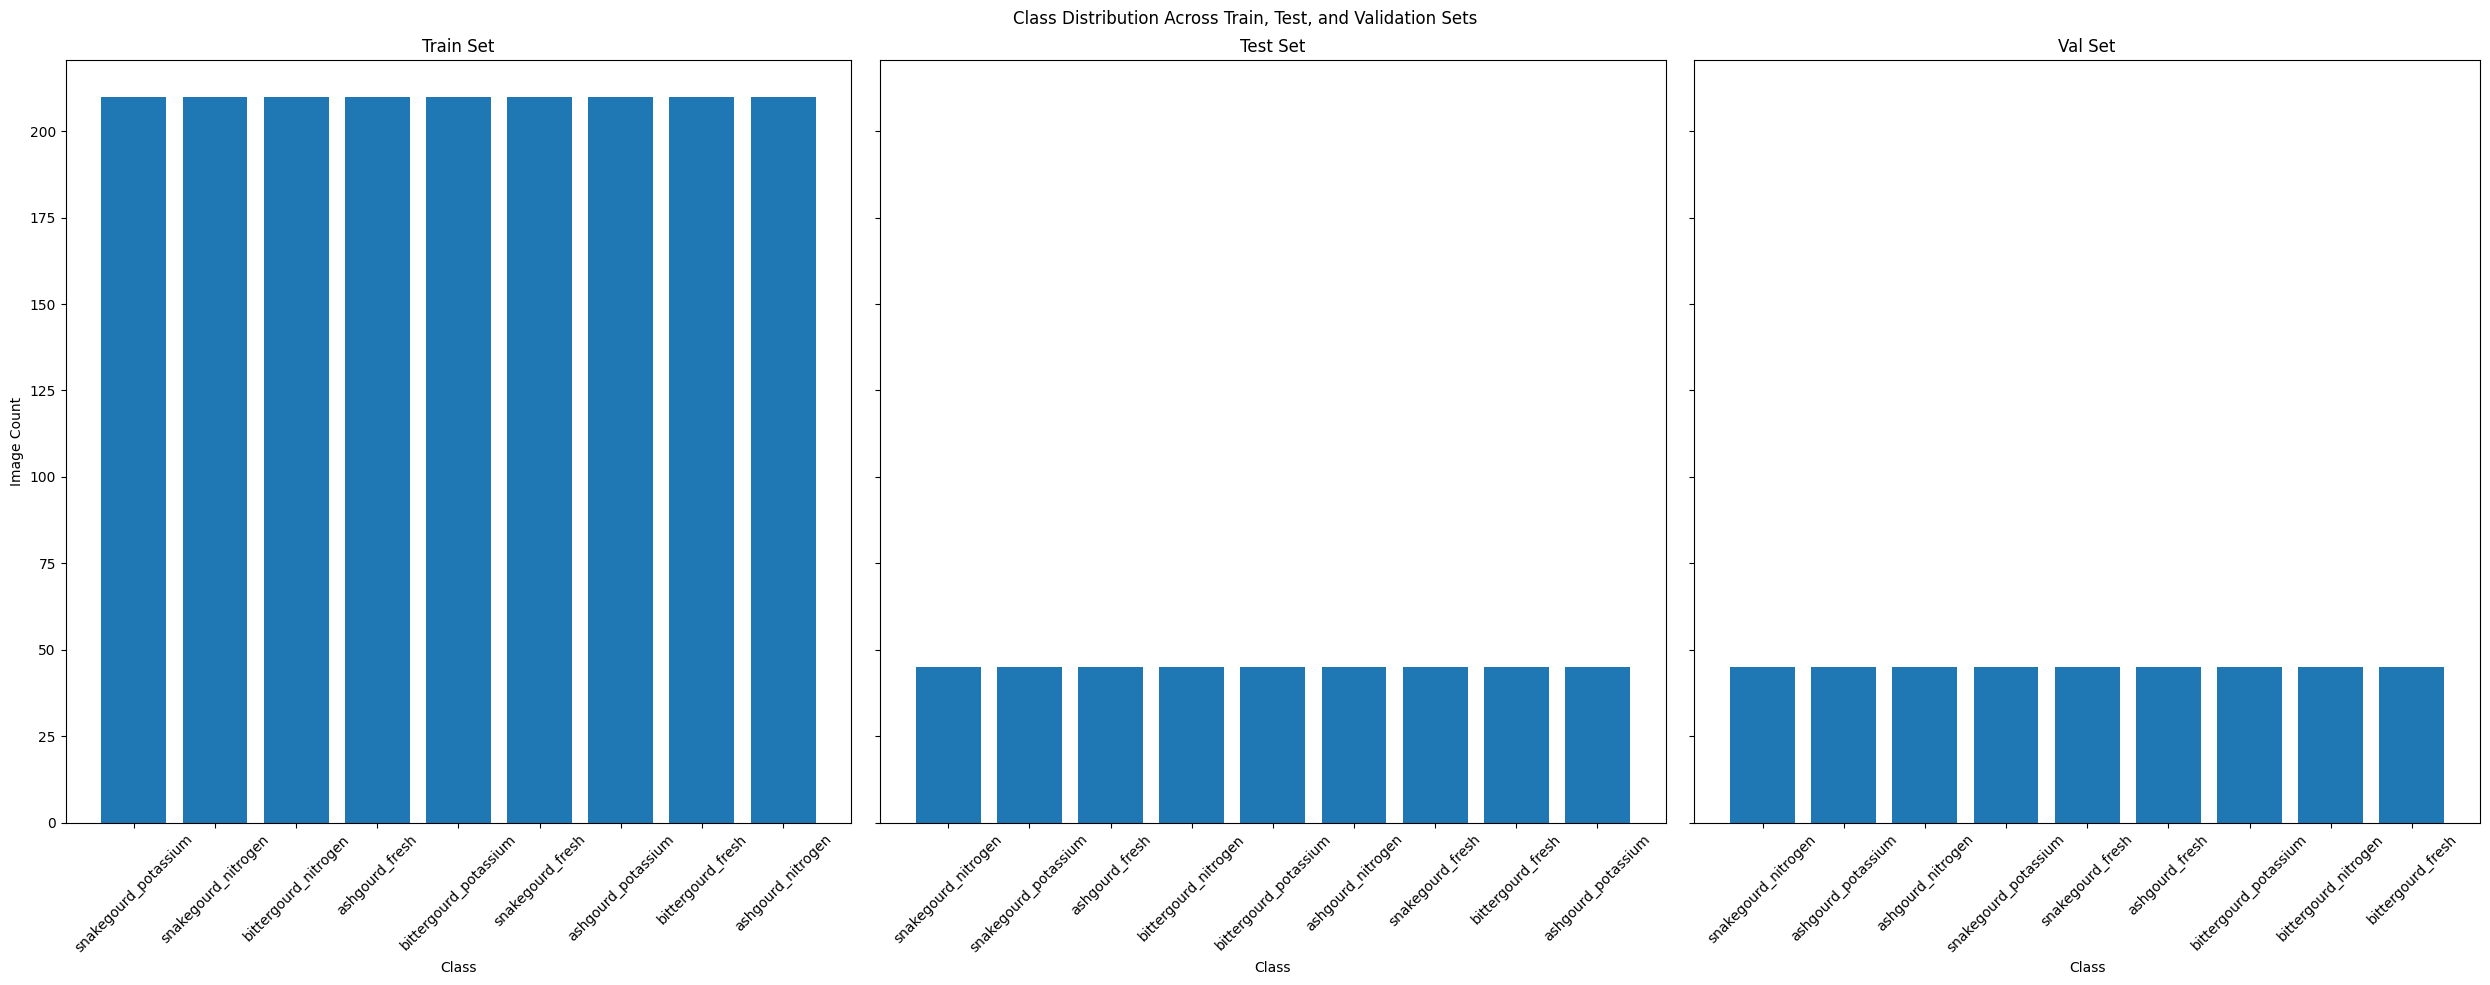

In [2]:
# Define the base directory
base_dir = r"/content/drive/MyDrive/Deep learning model for Early detection of plant nutritional deficiencies"

# Function to count images in each class for train, test, and validation sets
def count_images_in_folders(base_dir):
    class_counts = defaultdict(lambda: defaultdict(int))
    for split in ['train', 'test', 'val']:
        split_path = os.path.join(base_dir, split)
        if os.path.exists(split_path):
            for class_name in os.listdir(split_path):
                class_dir = os.path.join(split_path, class_name)
                if os.path.isdir(class_dir):
                    class_counts[split][class_name] = len(os.listdir(class_dir))
    return class_counts

# Get the class distribution
class_distribution = count_images_in_folders(base_dir)


fig, ax = plt.subplots(1, 3, figsize=(25, 10), sharey=True)

for idx, split in enumerate(['train', 'test', 'val']):
    class_counts = class_distribution.get(split, {})
    ax[idx].bar(class_counts.keys(), class_counts.values())
    ax[idx].set_title(f"{split.capitalize()} Set")
    ax[idx].set_xlabel("Class")
    ax[idx].set_ylabel("Image Count" if idx == 0 else "")
    ax[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.suptitle("Class Distribution Across Train, Test, and Validation Sets")
plt.tight_layout()
plt.show()


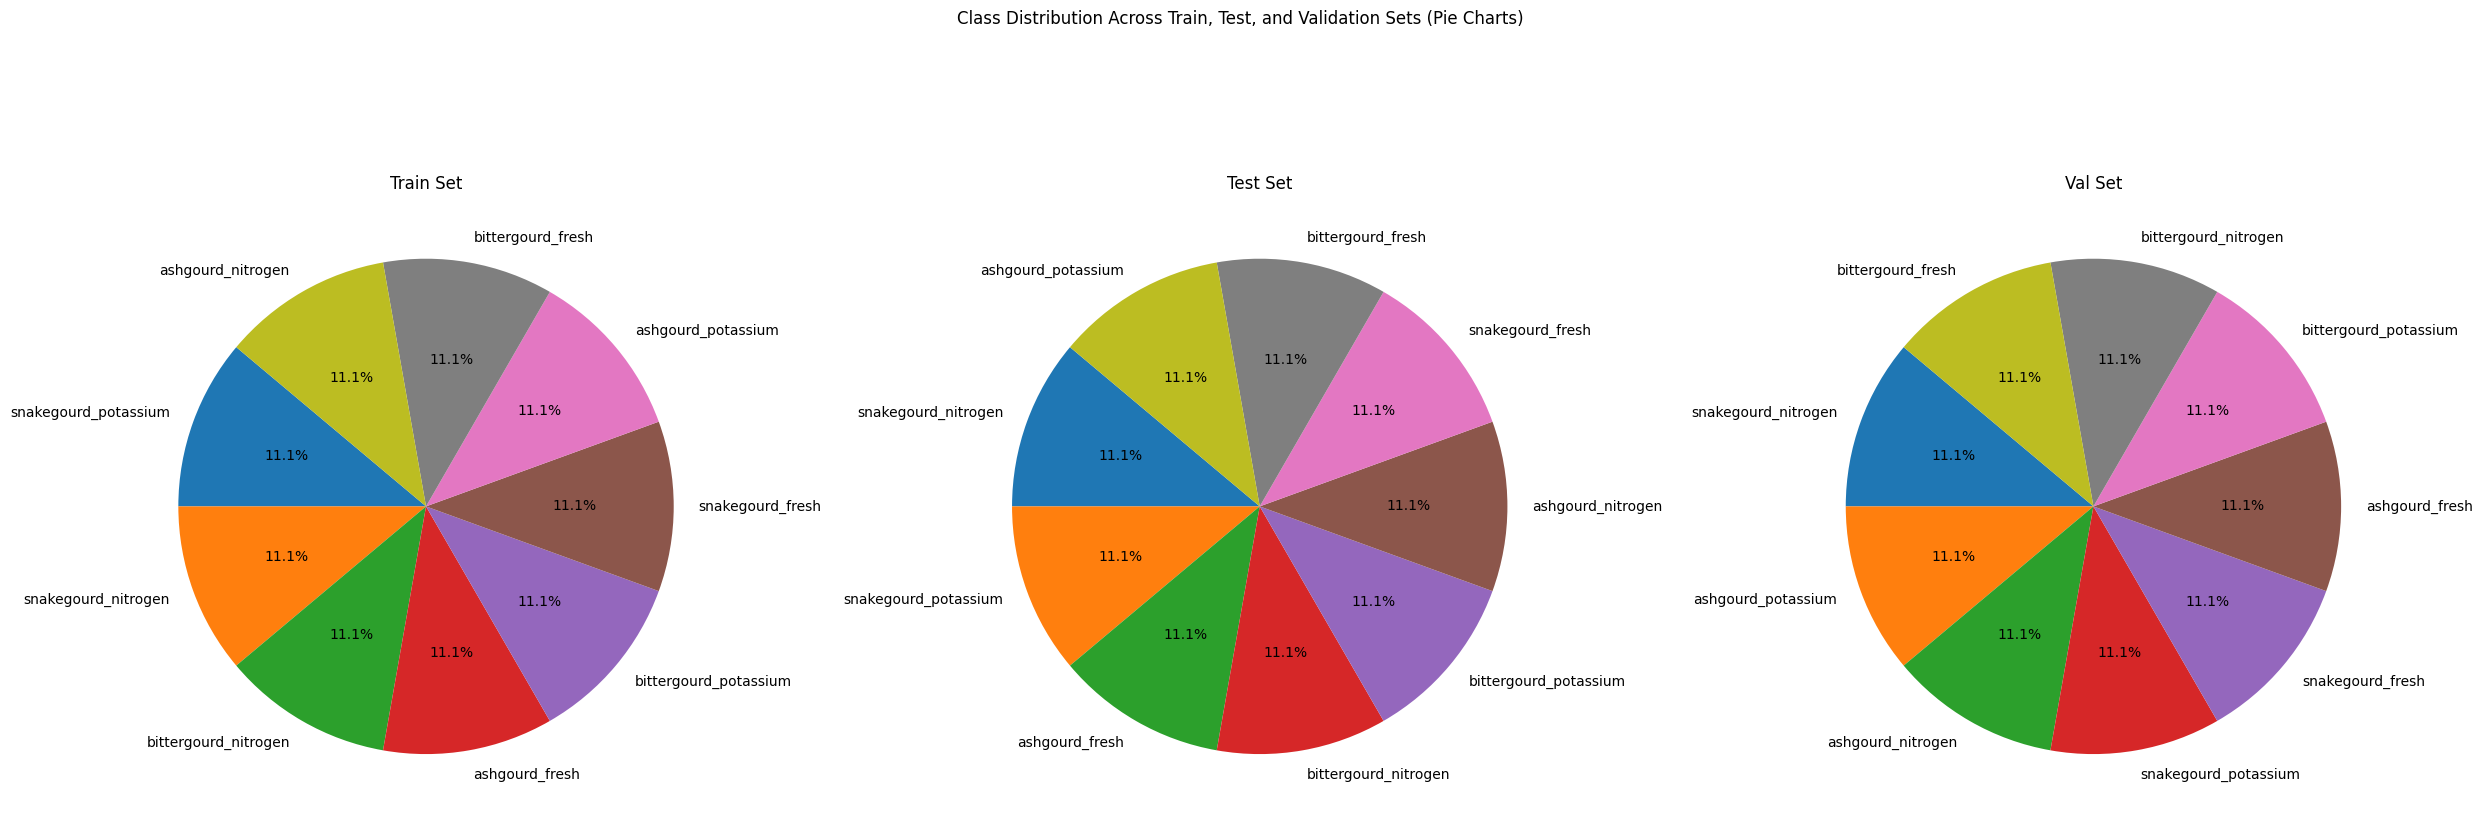

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

for idx, split in enumerate(['train', 'test', 'val']):
    class_counts = class_distribution.get(split, {})
    ax[idx].pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax[idx].set_title(f"{split.capitalize()} Set")

plt.suptitle("Class Distribution Across Train, Test, and Validation Sets (Pie Charts)")
plt.tight_layout()
plt.show()

**Random Images display from the dataset**

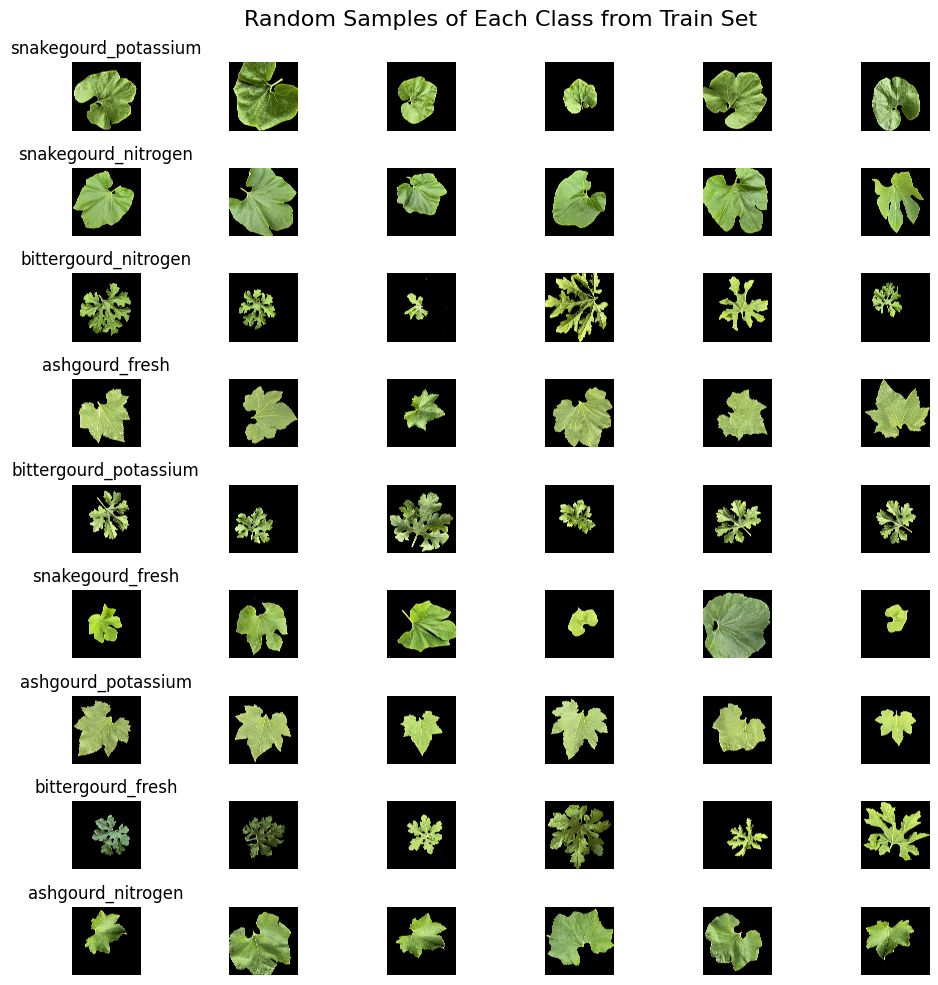

In [4]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to display random images from each class
def display_random_images(base_dir, num_images=6):
    # Increase the figsize to make images larger
    fig, axes = plt.subplots(len(class_distribution['train']), num_images, figsize=(20, 20))

    for idx, class_name in enumerate(class_distribution['train'].keys()):
        class_path = os.path.join(base_dir, 'train', class_name)
        image_files = os.listdir(class_path)
        sampled_images = random.sample(image_files, min(num_images, len(image_files)))

        for jdx, image_file in enumerate(sampled_images):
            img_path = os.path.join(class_path, image_file)
            img = Image.open(img_path)
            axes[idx, jdx].imshow(img)
            axes[idx, jdx].axis('off')
            if jdx == 0:
                axes[idx, jdx].set_title(class_name, fontsize=12)  # Optional: Set a font size for class titles

    plt.suptitle("Random Samples of Each Class from Train Set", fontsize=16)
    plt.tight_layout()
    plt.show()

# Display random images from each class in the train set
display_random_images(base_dir)


**Images size distribution**

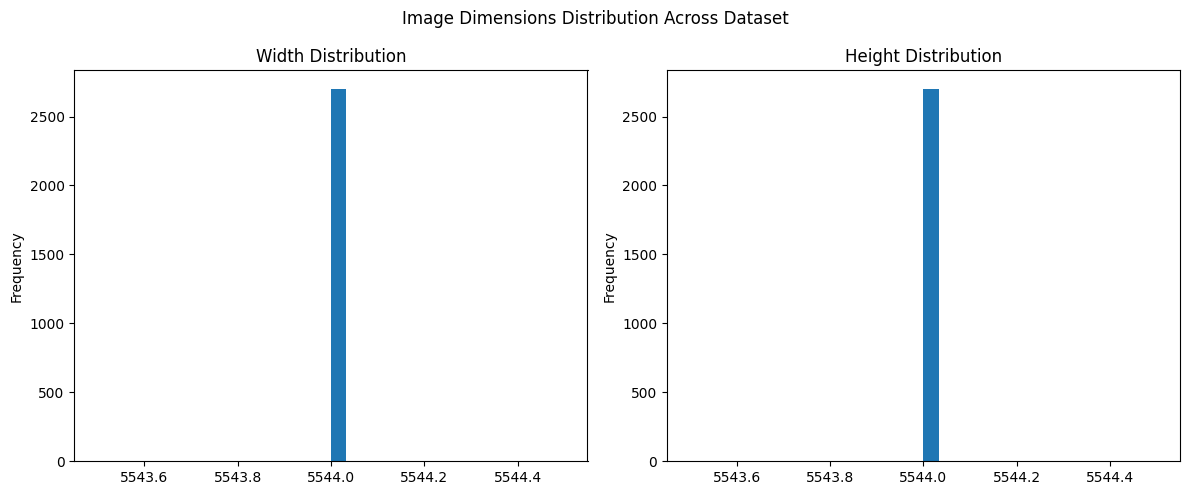

Width standard deviation: 0.0
Height standard deviation: 0.0
All images have the same dimensions. Reshaping may not be required.


In [5]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to gather image dimensions from a directory
def calculate_image_dimensions(base_dir):
    dimensions = defaultdict(list)
    for split in ['train', 'test', 'val']:
        split_path = os.path.join(base_dir, split)
        if os.path.exists(split_path):
            for class_name in os.listdir(split_path):
                class_dir = os.path.join(split_path, class_name)
                if os.path.isdir(class_dir):
                    for image_file in os.listdir(class_dir):
                        img_path = os.path.join(class_dir, image_file)
                        with Image.open(img_path) as img:
                            width, height = img.size
                            dimensions[split].append((width, height))
    return dimensions

# Calculate image dimensions
image_dimensions = calculate_image_dimensions(base_dir)

# Convert dimensions to a DataFrame for easier analysis
dimension_data = {'split': [], 'width': [], 'height': []}
for split, dims in image_dimensions.items():
    for (width, height) in dims:
        dimension_data['split'].append(split)
        dimension_data['width'].append(width)
        dimension_data['height'].append(height)

df = pd.DataFrame(dimension_data)

# Display the distribution of image dimensions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['width'].plot(kind='hist', bins=30, ax=ax[0], title="Width Distribution")
df['height'].plot(kind='hist', bins=30, ax=ax[1], title="Height Distribution")
plt.suptitle("Image Dimensions Distribution Across Dataset")
plt.tight_layout()
plt.show()

# Check if reshaping is required
width_std_dev = df['width'].std()
height_std_dev = df['height'].std()
print(f"Width standard deviation: {width_std_dev}")
print(f"Height standard deviation: {height_std_dev}")

# Recommendation
if width_std_dev > 0 or height_std_dev > 0:
    print("Images have varying dimensions. Consider resizing them to a uniform shape (e.g., 224x224) for model consistency.")
else:
    print("All images have the same dimensions. Reshaping may not be required.")
